In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset('titanic')


C:\Users\Dheeraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Dataset overview
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

male      577
female    314
Name: sex, dtype: int64


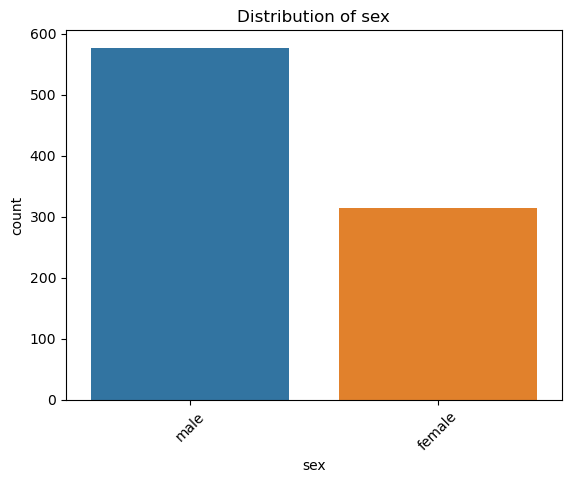

Third     491
First     216
Second    184
Name: class, dtype: int64


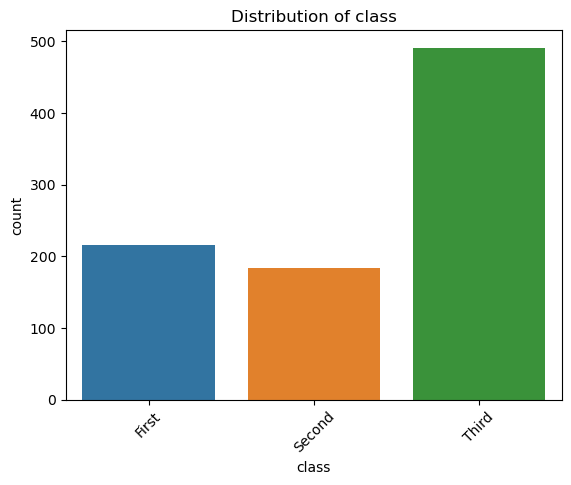

S    644
C    168
Q     77
Name: embarked, dtype: int64


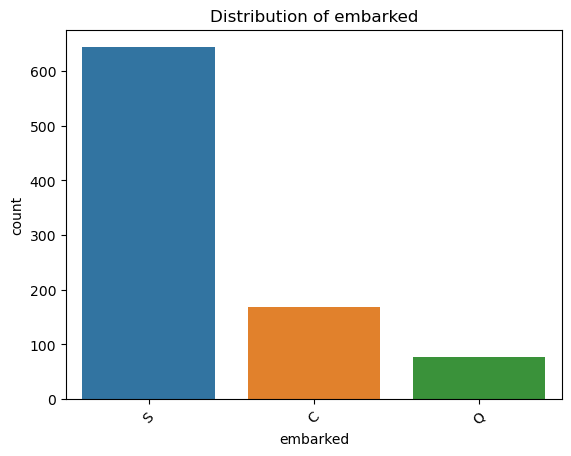

man      537
woman    271
child     83
Name: who, dtype: int64


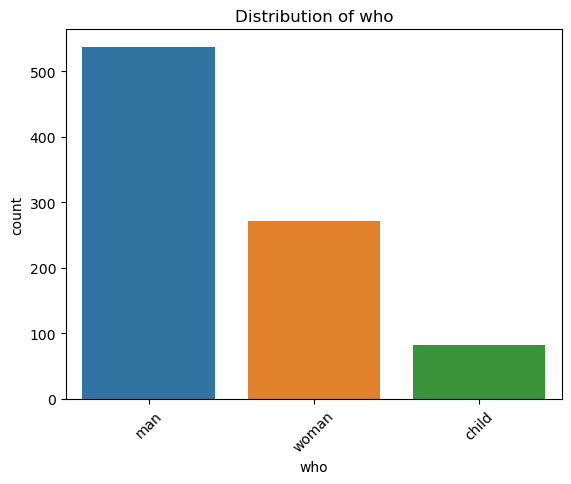

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64


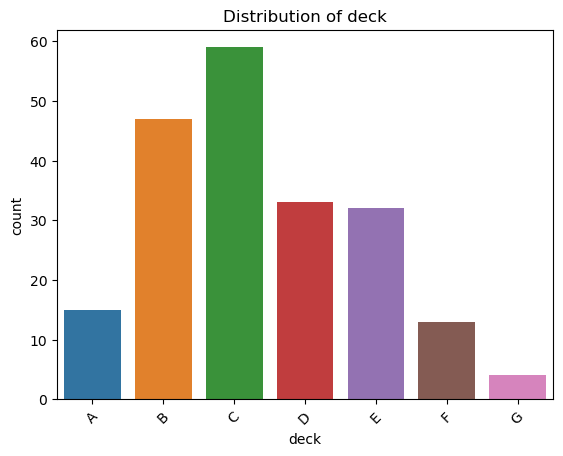

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


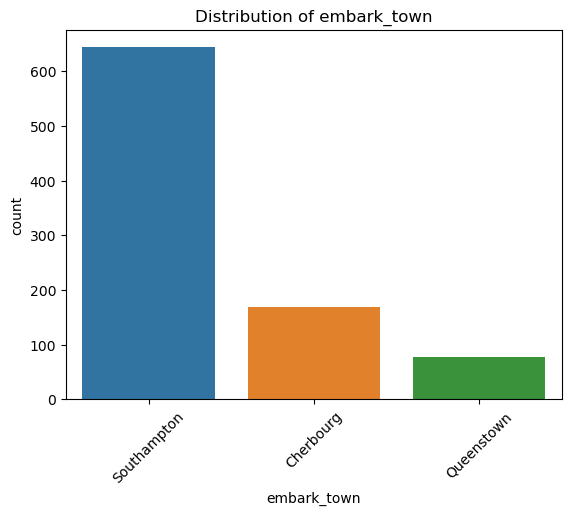

no     549
yes    342
Name: alive, dtype: int64


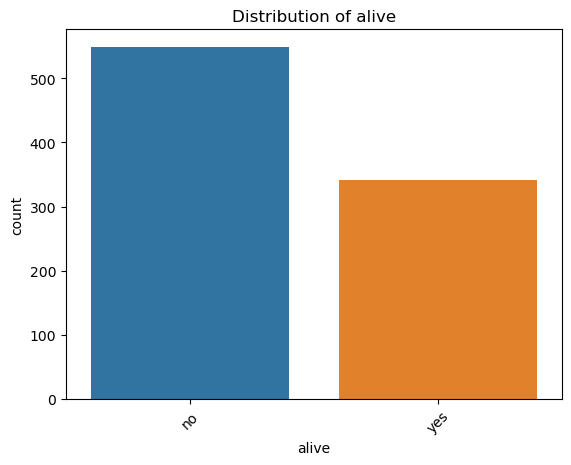

True     537
False    354
Name: alone, dtype: int64


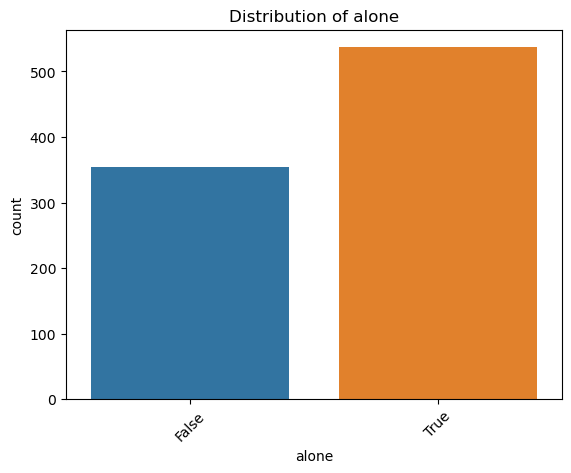

In [4]:
categorical_cols = ['sex', 'class', 'embarked', 'who', 'deck', 'embark_town', 'alive', 'alone']
for col in categorical_cols:
    print(df[col].value_counts())
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


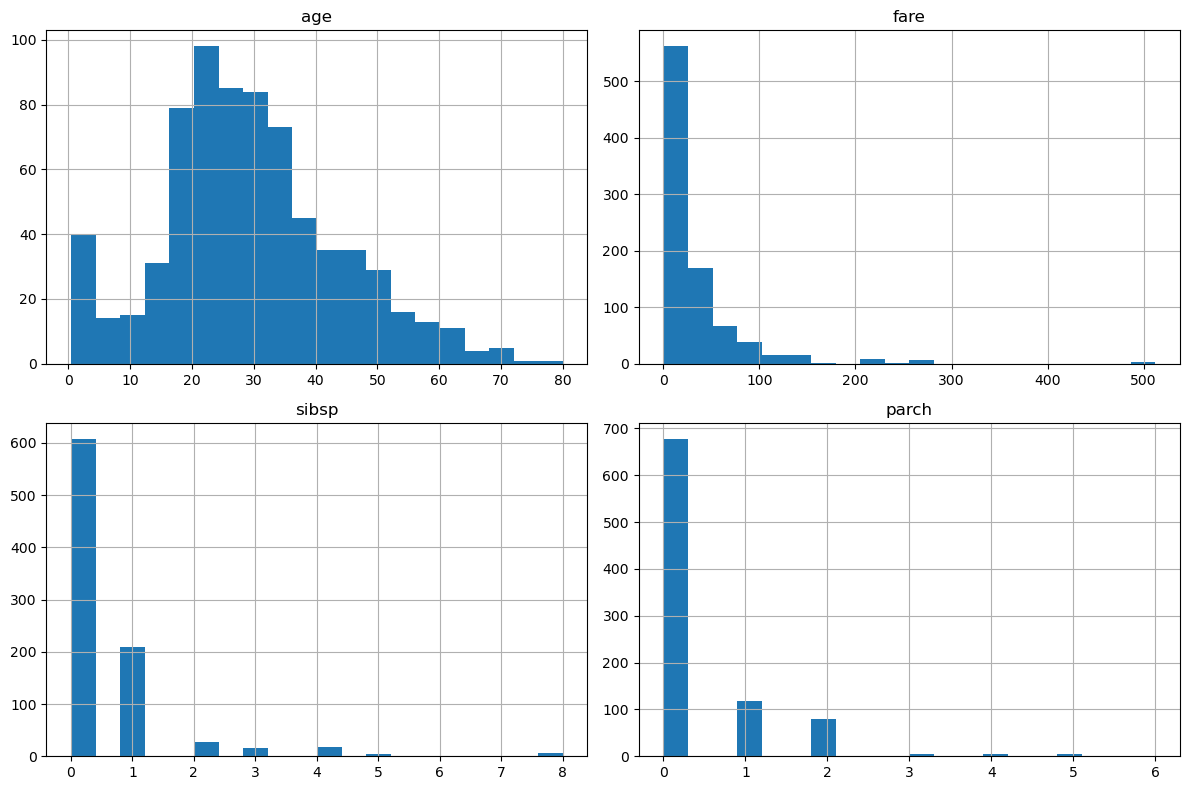

In [11]:
numerical_cols = ['age', 'fare', 'sibsp', 'parch']
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


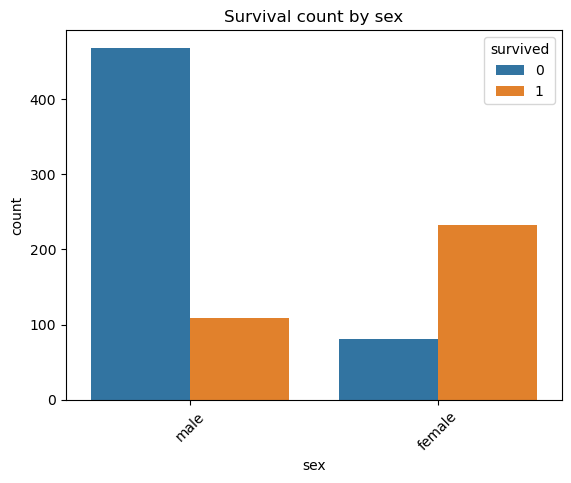

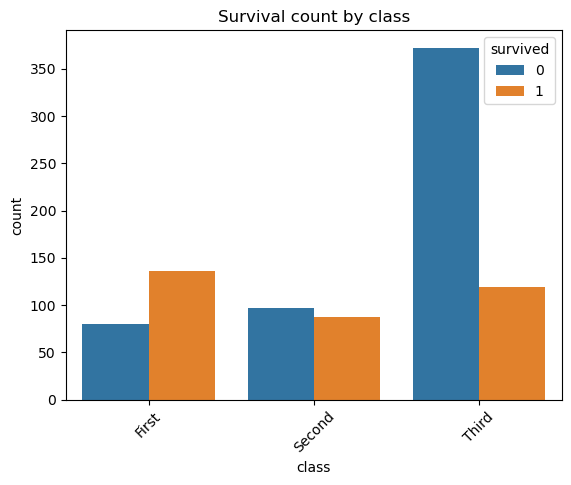

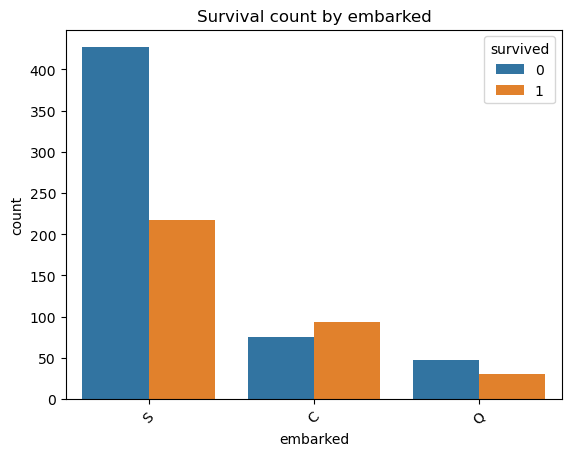

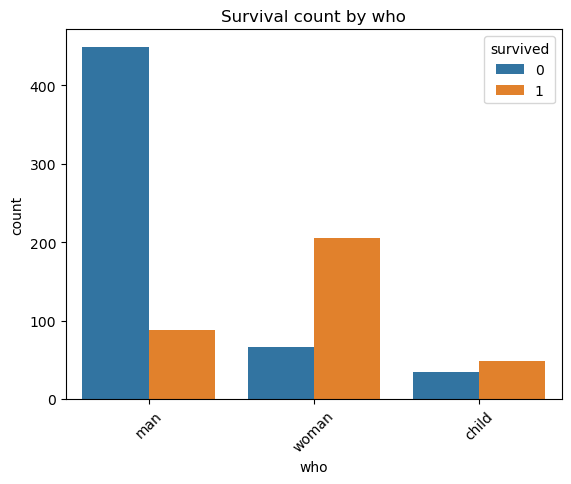

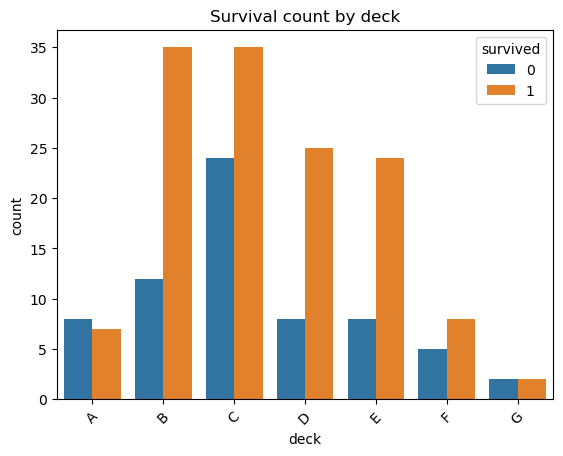

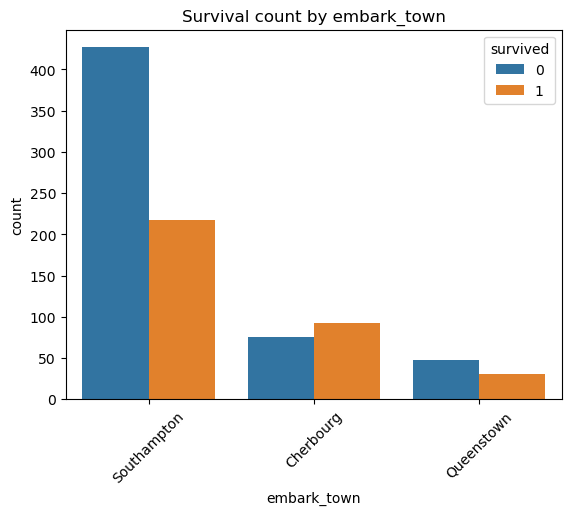

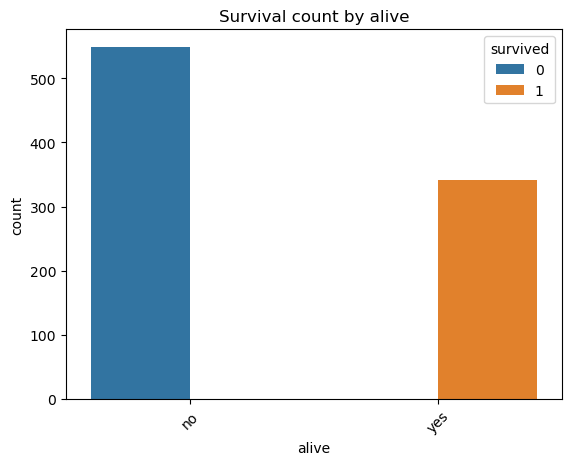

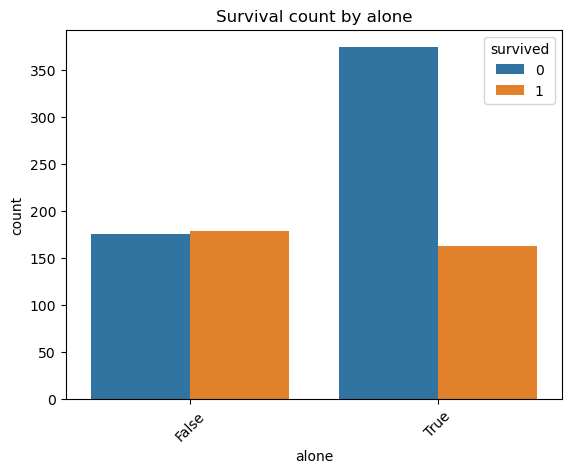

In [6]:
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='survived')
    plt.title(f'Survival count by {col}')
    plt.xticks(rotation=45)
    plt.show()


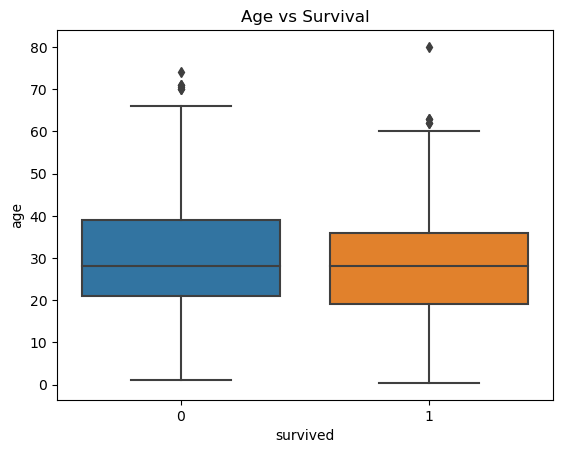

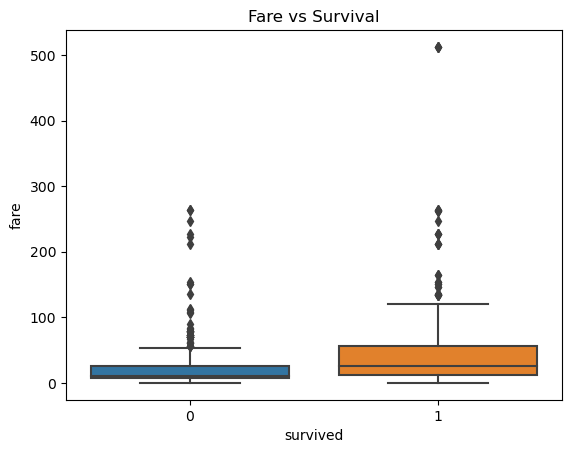

In [7]:
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age vs Survival')
plt.show()

sns.boxplot(data=df, x='survived', y='fare')
plt.title('Fare vs Survival')
plt.show()


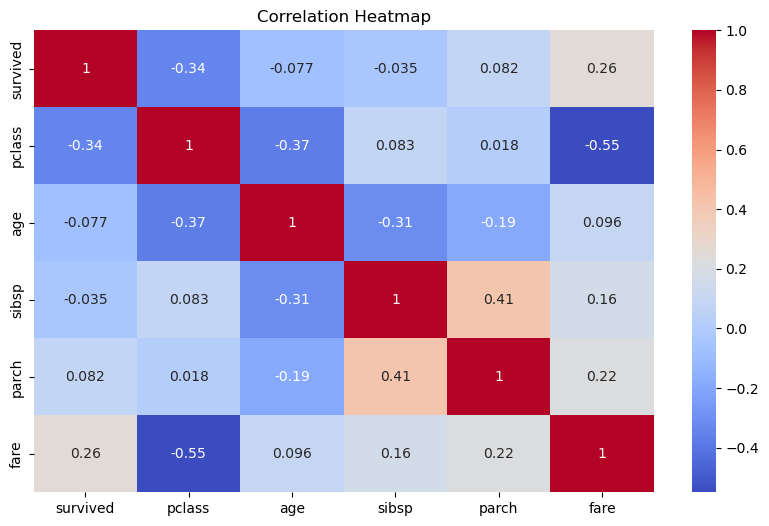

In [15]:
# Correlation heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include='number')  # selects only numeric columns
sns.heatmap(numeric_df.corr(), annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
